**Multiclass Obesity Prediction Model**

This notebook contains a machine learning model to classify individuals into obesity categories ie (underweight, normal, overweight and obese) as influenced by different variables such as weight, age, height, lifestyle and  health-related features.

There is further comparison in different clasification techniques(XGBoost, SVM and RandomForest) with neaural network model to gauge the best performing model with its regularizers and optimizers.

**Case Study and Implementation**

In [33]:
#Imports of necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                           f1_score, log_loss, classification_report, confusion_matrix)
from sklearn.preprocessing import LabelEncoder
from tqdm import tqdm
import pickle
import joblib

**Problem Statement**

The rising obesity rates in Rwanda, driven by unhealthy dietary habits and rapid urbanization, have led to an increase in non-communicable diseases, accounting for 44% of the country’s mortality. With Kigali city showing a 43.6% obesity prevalence, there is an urgent need for an effective tool to predict obesity risk based on individual health and lifestyle data. This project aims to develop a machine learning model for early obesity risk prediction and better health management.

 **The Dataset**



I retrieved the data from Kaggle. [Kaggle Obesity Classification Model](https://www.kaggle.com/code/divyam6969/best-solution-multiclass-obesity-prediction)

Below is a brief description of the variables

id = Identifier for each individual in the dataset

Gender = [Male or Female]

Age = Individual's age in years

Weight = Individual's weight

Height =  individual's Height in metres

Health and Lifestyle Factors

Family_history_with_overweight = Whether the  family has history with overweight (Yes/No)

FAvC = 	Frequent consumption
of high calorie food. Indicates if the an individual frequently eats high-calorie food (Yes/No).

FCVC =	Frequency of
consumption of vegetables, how often a person eats vegetables

NCP =	Number of main meals, number of main meals a person takes per day

CAEC = (Consumption of Food Between Meals): How often the person snacks between meals (like "Sometimes", "Frequently", or "Always").

SMOKE = Whether the person smokes (Yes/No).

CH2O = (Daily Water Intake): How much water the person drinks daily

SCC = (Caloric Consumption Monitoring): Whether the person monitors their caloric intake (Yes/No).


FAF = (Physical Activity Frequency): How often the person exercises

TUE = (Time Using Technology Devices): How much time the person spends using electronic devices daily

CALC - (Alcohol Consumption): Frequency of alcohol consumption ("Never", "Sometimes", "Frequently").

MTRANS (Mode of Transportation): How the person usually gets around (like "Walking", "Public Transport", "Car")

Target Variable

NObeyesdad: The classification of the individual’s weight condition — categories : "Normal Weight", "Overweight", "Obesity Type I", "Obesity Type II



In [2]:
def load_data(data_path):
    data_path = '/content/BMI.csv'
    data = pd.read_csv(data_path)
    return data



In [3]:
data = load_data('/content/BMI.csv')
data.head(50)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II
5,5,Male,18.128249,1.748524,51.552595,yes,yes,2.919751,3.000000,Sometimes,no,2.137550,no,1.930033,1.000000,Sometimes,Public_Transportation,Insufficient_Weight
6,6,Male,29.883021,1.754711,112.725005,yes,yes,1.991240,3.000000,Sometimes,no,2.000000,no,0.000000,0.696948,Sometimes,Automobile,Obesity_Type_II
7,7,Male,29.891473,1.750150,118.206565,yes,yes,1.397468,3.000000,Sometimes,no,2.000000,no,0.598655,0.000000,Sometimes,Automobile,Obesity_Type_II
8,8,Male,17.000000,1.700000,70.000000,no,yes,2.000000,3.000000,Sometimes,no,3.000000,yes,1.000000,1.000000,no,Public_Transportation,Overweight_Level_I
9,9,Female,26.000000,1.638836,111.275646,yes,yes,3.000000,3.000000,Sometimes,no,2.632253,no,0.000000,0.218645,Sometimes,Public_Transportation,Obesity_Type_III


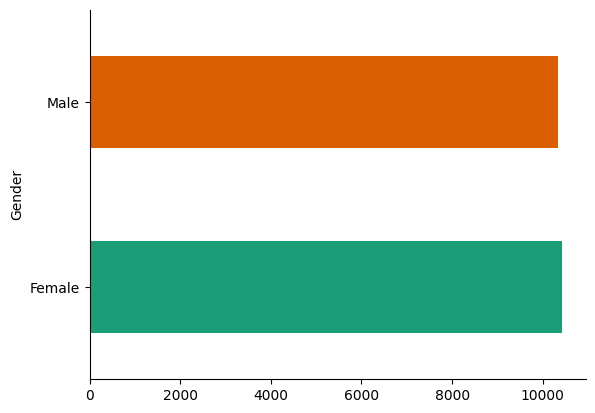

In [36]:
# @title Gender

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Gender').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

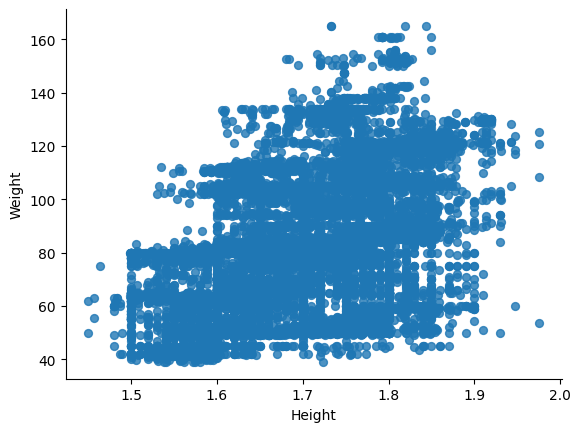

In [35]:
# @title Height vs Weight

from matplotlib import pyplot as plt
data.plot(kind='scatter', x='Height', y='Weight', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

In [4]:
data.columns

Index(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [5]:
data.describe()

,id,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,20758.00000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000,20758.000000
mean,10378.50000,23.841804,1.700245,87.887768,2.445908,2.761332,2.029418,0.981747,0.616756
std,5992.46278,5.688072,0.087312,26.379443,0.533218,0.705375,0.608467,0.838302,0.602113
min,0.00000,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,5189.25000,20.000000,1.631856,66.000000,2.000000,3.000000,1.792022,0.008013,0.000000
50%,10378.50000,22.815416,1.700000,84.064875,2.393837,3.000000,2.000000,1.000000,0.573887
75%,15567.75000,26.000000,1.762887,111.600553,3.000000,3.000000,2.549617,1.587406,1.000000
max,20757.00000,61.000000,1.975663,165.057269,3.000000,4.000000,3.000000,3.000000,2.000000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [7]:
data.shape

(20758, 18)

In [8]:
data.isnull().sum()

,0
id,0
Gender,0
Age,0
Height,0
Weight,0
family_history_with_overweight,0
FAVC,0
FCVC,0
NCP,0
CAEC,0


In [ ]:


def transform_binary_columns(data, binary_cols=None):
    """
    Transform binary categorical columns to numerical values.

    Parameters:
    data (pd.DataFrame): The dataset to transform
    binary_cols (list): List of binary categorical column names

    Returns:
    pd.DataFrame: Transformed dataframe with binary columns converted to 0/1
    """
    if binary_cols is None:
        binary_cols = ['Gender', 'family_history_with_overweight', 'FAVC', 'SMOKE', 'SCC']

    data_copy = data.copy()
    for col in binary_cols:
        data_copy[col] = data_copy[col].map({'yes': 1, 'no': 0, 'Male': 1, 'Female': 0})

    return data_copy

def transform_ordinal_columns(data, ordinal_mappings=None):
    """
    Transform ordinal categorical columns to numerical values.

    Parameters:
    data (pd.DataFrame): The dataset to transform
    ordinal_mappings (dict): Dictionary mapping column names to their ordinal mappings

    Returns:
    pd.DataFrame: Transformed dataframe with ordinal columns converted to numerical values
    """
    if ordinal_mappings is None:
        ordinal_mappings = {
            'CAEC': {'Never': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3},
            'CALC': {'Never': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}
        }

    data_copy = data.copy()
    for col, mapping in ordinal_mappings.items():
        data_copy[col] = data_copy[col].map(mapping)

    return data_copy

def apply_one_hot_encoding(data, columns=None):
    """
    Apply one-hot encoding to specified columns.

    Parameters:
    data (pd.DataFrame): The dataset to transform
    columns (list): List of column names to one-hot encode

    Returns:
    pd.DataFrame: Transformed dataframe with one-hot encoded columns
    """
    if columns is None:
        columns = ['MTRANS']

    return pd.get_dummies(data, columns=columns)

def encode_target_variable(data, target_col='NObeyesdad', target_mapping=None):
    """
    Encode the target variable with numerical values.

    Parameters:
    data (pd.DataFrame): The dataset to transform
    target_col (str): The name of the target column
    target_mapping (dict): Dictionary mapping target categories to numerical values

    Returns:
    pd.DataFrame: Transformed dataframe with encoded target variable
    """
    if target_mapping is None:
        target_mapping = {
            'Insufficient_Weight': 0,
            'Normal_Weight': 1,
            'Overweight_Level_I': 2,
            'Overweight_Level_II': 3,
            'Obesity_Type_I': 4,
            'Obesity_Type_II': 5,
            'Obesity_Type_III': 6
        }

    data_copy = data.copy()
    data_copy[target_col] = data_copy[target_col].map(target_mapping)

    return data_copy

def handle_missing_values(data, strategy='fill_zero'):
    """
    Handle missing values in the dataset.

    Parameters:
    data (pd.DataFrame): The dataset with missing values
    strategy (str): Strategy to handle missing values (currently only 'fill_zero' is implemented)

    Returns:
    pd.DataFrame: Dataset with handled missing values
    """
    data_copy = data.copy()

    if strategy == 'fill_zero':
        data_copy.fillna(0, inplace=True)

    return data_copy

def preprocess_dataset(data, save_path=None):
    """
    Main function to preprocess the dataset with all the steps.

    Parameters:
    data (pd.DataFrame): The raw dataset
    save_path (str): Path to save the processed dataset (if None, dataset won't be saved)

    Returns:
    pd.DataFrame: Fully processed dataset
    """
    # Apply all transformations
    processed_data = transform_binary_columns(data)
    processed_data = transform_ordinal_columns(processed_data)
    processed_data = apply_one_hot_encoding(processed_data)
    processed_data = encode_target_variable(processed_data)
    processed_data = handle_missing_values(processed_data)

    # Save the processed dataset 
    if save_path:
        processed_data.to_csv(save_path, index=False)

    return processed_data

# usage
processed_data = preprocess_dataset(data, save_path="processed_dataset.csv")
processed_data.head(10)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,...,SCC,FAF,TUE,CALC,NObeyesdad,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,0,1,24.443011,1.699998,81.669950,1,1,2.000000,2.983297,1.0,...,0,0.000000,0.976473,1.0,3,False,False,False,True,False
1,1,0,18.000000,1.560000,57.000000,1,1,2.000000,3.000000,2.0,...,0,1.000000,1.000000,0.0,1,True,False,False,False,False
2,2,0,18.000000,1.711460,50.165754,1,1,1.880534,1.411685,1.0,...,0,0.866045,1.673584,0.0,0,False,False,False,True,False
3,3,0,20.952737,1.710730,131.274851,1,1,3.000000,3.000000,1.0,...,0,1.467863,0.780199,1.0,6,False,False,False,True,False
4,4,1,31.641081,1.914186,93.798055,1,1,2.679664,1.971472,1.0,...,0,1.967973,0.931721,1.0,3,False,False,False,True,False
5,5,1,18.128249,1.748524,51.552595,1,1,2.919751,3.000000,1.0,...,0,1.930033,1.000000,1.0,0,False,False,False,True,False
6,6,1,29.883021,1.754711,112.725005,1,1,1.991240,3.000000,1.0,...,0,0.000000,0.696948,1.0,5,True,False,False,False,False
7,7,1,29.891473,1.750150,118.206565,1,1,1.397468,3.000000,1.0,...,0,0.598655,0.000000,1.0,5,True,False,False,False,False
8,8,1,17.000000,1.700000,70.000000,0,1,2.000000,3.000000,1.0,...,1,1.000000,1.000000,0.0,2,False,False,False,True,False
9,9,0,26.000000,1.638836,111.275646,1,1,3.000000,3.000000,1.0,...,0,0.000000,0.218645,1.0,6,False,False,False,True,False


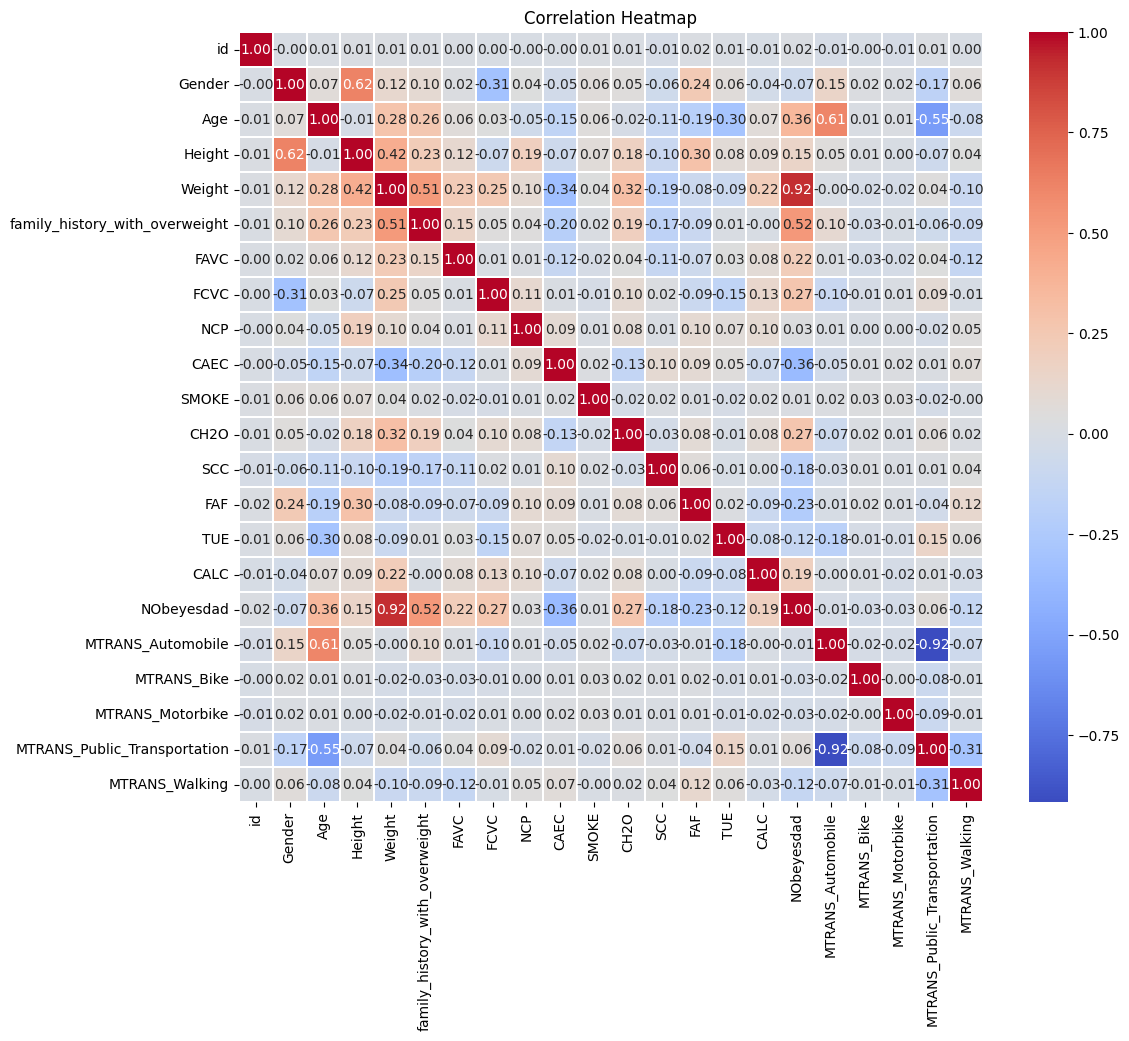

In [10]:
def plot_correlation_heatmap(data, figsize=(12, 10), cmap='coolwarm'):
    """
    Plots a correlation heatmap for the given dataset.

    Parameters:
    data (pd.DataFrame): The input DataFrame.
    figsize (tuple): Figure size for the heatmap.
    cmap (str): Colormap for the heatmap.

    Returns:
    None
    """
    correlation_matrix = data.corr(numeric_only=True)

    plt.figure(figsize=figsize)
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap=cmap, linewidths=0.3)
    plt.title('Correlation Heatmap')
    plt.show()

# Example usage:
plot_correlation_heatmap(processed_data)

**Model Architecture:**

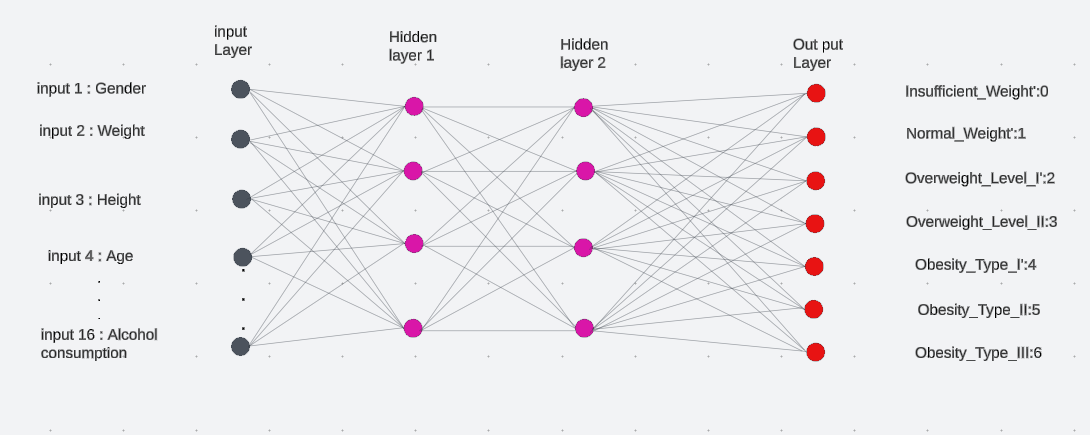

In [34]:
def split_data(data, target_col='NObeyesdad', num_classes=7, test_size=0.3, val_size=0.5, random_state=42):
    """
    Splits the dataset into training, validation, and testing sets and stores them in CSV files.

    Parameters:
    data (pd.DataFrame): The input dataset.
    target_col (str): The name of the target column.
    num_classes (int): Number of classes for one-hot encoding.
    test_size (float): Proportion of data for testing + validation.
    val_size (float): Proportion of the remaining test set for validation.
    random_state (int): Random seed for reproducibility.

    Returns:
    tuple: X_train, X_val, X_test, y_train, y_val, y_test
    """
    # Separate features and target
    X = data.drop(columns=[target_col])
    y = data[target_col]

    # Convert target variable to numerical using LabelEncoder before one-hot encoding
    label_encoder = LabelEncoder()
    y = label_encoder.fit_transform(y)

    # Convert target variable to categorical
    y = tf.keras.utils.to_categorical(y, num_classes=num_classes)

    # First split: training (70%), temp (30%)
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=test_size, random_state=random_state)

    # Second split: validation (15%), testing (15%)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=val_size, random_state=random_state)

    # Save training and test data to CSV files
    train_data = pd.concat([X_train, pd.DataFrame(y_train, columns=[f'class_{i}' for i in range(num_classes)])], axis=1)
    test_data = pd.concat([X_test, pd.DataFrame(y_test, columns=[f'class_{i}' for i in range(num_classes)])], axis=1)

    train_data.to_csv('train.csv', index=False)
    test_data.to_csv('test.csv', index=False)

    return X_train, X_val, X_test, y_train, y_val, y_test

# Example usage:
X_train, X_val, X_test, y_train, y_val, y_test = split_data(processed_data)


In [12]:
print(f"Training Set: {X_train.shape}, {y_train.shape}")
print(f"Validation Set: {X_val.shape}, {y_val.shape}")
print(f"Testing Set: {X_test.shape}, {y_test.shape}")


Training Set: (14530, 21), (14530, 7)
Validation Set: (3114, 21), (3114, 7)
Testing Set: (3114, 21), (3114, 7)


In [13]:
print(X_train.isnull().sum())
print(X_train.dtypes)
print(y_train.dtype)

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS_Automobile                 0
MTRANS_Bike                       0
MTRANS_Motorbike                  0
MTRANS_Public_Transportation      0
MTRANS_Walking                    0
dtype: int64
id                                  int64
Gender                              int64
Age                               float64
Height                            float64
Weight                            float64
family_history_with_o

In [14]:
print(y_train.dtype)

float64


In [15]:


def normalize_data(X_train, X_val=None, X_test=None):
    """
    Normalizes (standardizes) the data using StandardScaler.

    Parameters:
    X_train (pd.DataFrame or np.array): Training data.
    X_val (pd.DataFrame or np.array, optional): Validation data.
    X_test (pd.DataFrame or np.array, optional): Test data.

    Returns:
    tuple: Scaled versions of X_train, X_val, and X_test (if provided).
    """
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)

    X_val_scaled = scaler.transform(X_val) if X_val is not None else None
    X_test_scaled = scaler.transform(X_test) if X_test is not None else None

    return X_train_scaled, X_val_scaled, X_test_scaled

# Example usage:
X_train_scaled, X_val_scaled, X_test_scaled = normalize_data(X_train, X_val, X_test)

Training Random Forest and calculating losses...


100%|██████████| 20/20 [01:07<00:00,  3.37s/it]



Training final model with all trees...

Model saved as rf_model.pkl


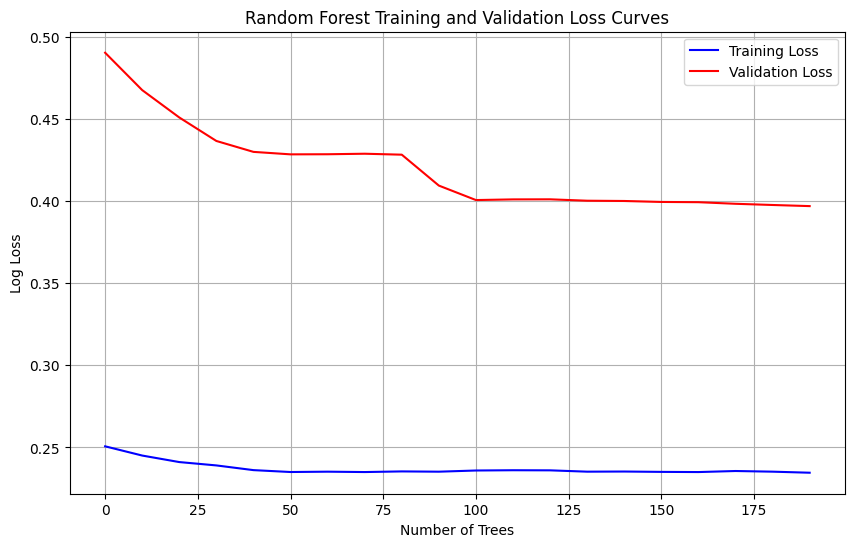


Validation Metrics:
Random Forest Validation Accuracy: 0.89
Precision: 0.89
Recall: 0.89
F1 Score: 0.89
Log Loss: 0.3968

Validation Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91       376
           1       0.79      0.89      0.84       441
           2       0.79      0.72      0.75       388
           3       0.78      0.81      0.79       377
           4       0.89      0.86      0.87       422
           5       0.96      0.98      0.97       509
           6       1.00      1.00      1.00       601

    accuracy                           0.89      3114
   macro avg       0.88      0.88      0.88      3114
weighted avg       0.89      0.89      0.89      3114



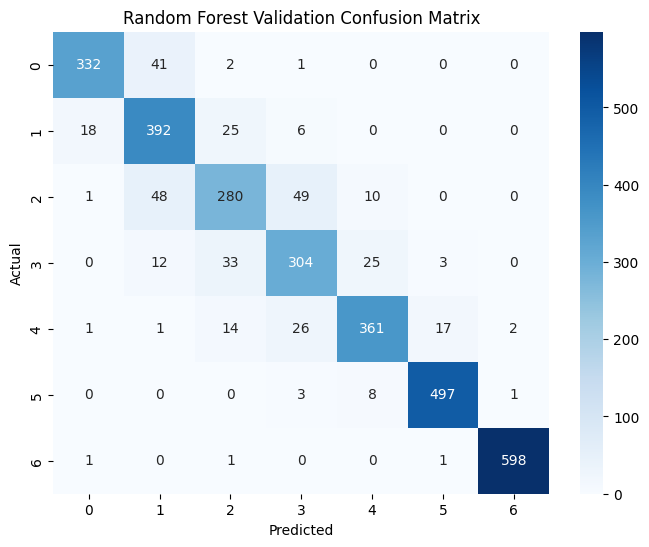


Test Metrics:
Random Forest Test Accuracy: 0.90
Precision: 0.90
Recall: 0.90
F1 Score: 0.90
Log Loss: 0.3785

Test Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.92      0.93       379
           1       0.82      0.90      0.86       466
           2       0.79      0.73      0.76       345
           3       0.80      0.80      0.80       386
           4       0.89      0.86      0.88       436
           5       0.97      0.98      0.98       496
           6       1.00      1.00      1.00       606

    accuracy                           0.90      3114
   macro avg       0.89      0.88      0.89      3114
weighted avg       0.90      0.90      0.90      3114



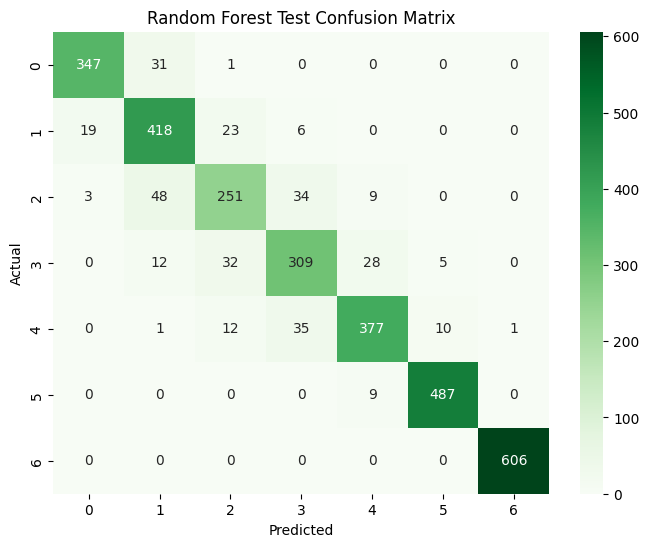

In [16]:

# RandomForest Model

def train_and_evaluate_rf(X_train, y_train, X_val, y_val, X_test, y_test):
    # Convert one-hot encoded labels to 1D arrays if needed
    if len(y_train.shape) > 1:
        y_train_1d = np.argmax(y_train, axis=1)
        y_val_1d = np.argmax(y_val, axis=1)
        y_test_1d = np.argmax(y_test, axis=1)
    else:
        y_train_1d = y_train
        y_val_1d = y_val
        y_test_1d = y_test

    # Initialize Random Forest model
    rf_model = RandomForestClassifier(
        n_estimators=200,
        max_depth=15,
        min_samples_split=5,
        min_samples_leaf=2,
        max_features='sqrt',
        bootstrap=True,
        random_state=42,
        verbose=0
    )

    # Lists to store losses
    train_losses = []
    val_losses = []

    # Train the model incrementally to track loss
    print("Training Random Forest and calculating losses...")

    # Below is a series of partial forests to track learning progress

    n_steps = 20  # Number of points to plot in the loss curve
    trees_per_step = rf_model.n_estimators // n_steps

    for i in tqdm(range(1, n_steps + 1)):
        # Train a partial forest
        temp_rf = RandomForestClassifier(
            n_estimators=trees_per_step * i,
            max_depth=15,
            min_samples_split=5,
            min_samples_leaf=2,
            max_features='sqrt',
            bootstrap=True,
            random_state=42,
            verbose=0
        )

        temp_rf.fit(X_train, y_train_1d)

        # Calculate and store training loss
        train_proba = temp_rf.predict_proba(X_train)
        train_loss = log_loss(y_train, train_proba)
        train_losses.append(train_loss)

        # Calculate and store validation loss
        val_proba = temp_rf.predict_proba(X_val)
        val_loss = log_loss(y_val, val_proba)
        val_losses.append(val_loss)

    # Train the final model with all trees
    print("\nTraining final model with all trees...")
    rf_model.fit(X_train, y_train_1d)

    import pickle
    with open('rf_model.pkl', 'wb') as f:
        pickle.dump(rf_model, f)
    print("\nModel saved as rf_model.pkl")

    # Plot the loss curves
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(len(train_losses)) * trees_per_step, train_losses,
             label='Training Loss', color='blue')
    plt.plot(np.arange(len(val_losses)) * trees_per_step, val_losses,
             label='Validation Loss', color='red')
    plt.xlabel('Number of Trees')
    plt.ylabel('Log Loss')
    plt.title('Random Forest Training and Validation Loss Curves')
    plt.legend()
    plt.grid(True)
    plt.show()

    # Validation predictions and metrics
    print("\nValidation Metrics:")
    y_pred_rf_val = rf_model.predict(X_val)
    val_proba = rf_model.predict_proba(X_val)

    val_accuracy = accuracy_score(y_val_1d, y_pred_rf_val)
    val_precision = precision_score(y_val_1d, y_pred_rf_val, average='weighted')
    val_recall = recall_score(y_val_1d, y_pred_rf_val, average='weighted')
    val_f1 = f1_score(y_val_1d, y_pred_rf_val, average='weighted')
    val_loss = log_loss(y_val, val_proba)

    print(f"Random Forest Validation Accuracy: {val_accuracy:.2f}")
    print(f"Precision: {val_precision:.2f}")
    print(f"Recall: {val_recall:.2f}")
    print(f"F1 Score: {val_f1:.2f}")
    print(f"Log Loss: {val_loss:.4f}")
    print("\nValidation Classification Report:")
    print(classification_report(y_val_1d, y_pred_rf_val))

    # Plot validation confusion matrix
    plt.figure(figsize=(8, 6))
    cm_val = confusion_matrix(y_val_1d, y_pred_rf_val)
    sns.heatmap(cm_val, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Random Forest Validation Confusion Matrix')
    plt.show()

    # Test predictions and metrics
    print("\nTest Metrics:")
    y_pred_rf_test = rf_model.predict(X_test)
    test_proba = rf_model.predict_proba(X_test)

    test_accuracy = accuracy_score(y_test_1d, y_pred_rf_test)
    test_precision = precision_score(y_test_1d, y_pred_rf_test, average='weighted')
    test_recall = recall_score(y_test_1d, y_pred_rf_test, average='weighted')
    test_f1 = f1_score(y_test_1d, y_pred_rf_test, average='weighted')
    test_loss = log_loss(y_test, test_proba)

    print(f"Random Forest Test Accuracy: {test_accuracy:.2f}")
    print(f"Precision: {test_precision:.2f}")
    print(f"Recall: {test_recall:.2f}")
    print(f"F1 Score: {test_f1:.2f}")
    print(f"Log Loss: {test_loss:.4f}")
    print("\nTest Classification Report:")
    print(classification_report(y_test_1d, y_pred_rf_test))

    # Plot test confusion matrix
    plt.figure(figsize=(8, 6))
    cm_test = confusion_matrix(y_test_1d, y_pred_rf_test)
    sns.heatmap(cm_test, annot=True, fmt='d', cmap='Greens')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Random Forest Test Confusion Matrix')
    plt.show()

    return rf_model

# Call the Random Forest function
model = train_and_evaluate_rf(X_train, y_train, X_val, y_val, X_test, y_test)


In [22]:
model.feature_names_in_



array(['id', 'Gender', 'Age', 'Height', 'Weight',
       'family_history_with_overweight', 'FAVC', 'FCVC', 'NCP', 'CAEC',
       'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE', 'CALC', 'MTRANS_Automobile',
       'MTRANS_Bike', 'MTRANS_Motorbike', 'MTRANS_Public_Transportation',
       'MTRANS_Walking'], dtype=object)

In [17]:
#Load and Make Predictions

# BMI Classification mapping
BMI_CLASSES = {
    0: 'Insufficient_Weight',   # Less than 18.5
    1: 'Normal_Weight',        # 18.5 to 24.9
    2: 'Overweight_Level_I',   # 25 to 27.49
    3: 'Overweight_Level_II',  # 27.5 to 29.9
    4: 'Obesity_Type_I',       # 30.0 to 34.9
    5: 'Obesity_Type_II',      # 35.0 to 39.9
    6: 'Obesity_Type_III'      # Higher than 40
}

def load_models(*filenames):
    """Load the trained model """
    models = {}
    for filename in filenames:
        try:
            models[filename] = joblib.load(filename)
            print(f"Successfully loaded {filename}")
        except Exception as e:
            print(f"Failed to load {filename}: {e}")
    return models

def predict_with_models(models, features):
    """Make predictions using the model"""
    expected_features = models['rf_model.pkl'].n_features_in_

    if len(features) != expected_features:
        raise ValueError(f"Model expects {expected_features} features, but got {len(features)}")


    features = np.array(features).reshape(1, -1)
    results = {}

    for model_name, model in models.items():
        try:
            prediction = model.predict(features)[0]
            probability = model.predict_proba(features)[0]

            results[model_name] = {
                'predicted_class': BMI_CLASSES[prediction],
                'class_number': int(prediction),
                'confidence': float(max(probability) * 100)
            }
        except Exception as e:
            print(f"Prediction failed for {model_name}: {e}")

    return results

def display_predictions(results):
    """Display predictions from the model"""
    print("\nPrediction from the model:")
    print("-" * 50)
    for model_name, result in results.items():
        print(f"\nModel: {model_name}")
        print(f"Predicted BMI Class: {result['predicted_class']}")
        print(f"Confidence: {result['confidence']:.2f}%")
        print("-" * 30)

if __name__ == "__main__":
    try:
        # Load all available models
        model_files = ['rf_model.pkl']
        models = load_models(*model_files)

        if not models:
            raise FileNotFoundError("No models could be loaded")

        # Example features
        sample_features = [23, 25, 1, 70, 14, 67, 22, 30, 10, 23, 27, 40, 7, 11, 22, 1, 0, 12, 40, 70, 170]

        # Make predictions with all models
        results = predict_with_models(models, sample_features)

        # Display results
        display_predictions(results)

    except FileNotFoundError as e:
        print(f"Error: {e}")
    except Exception as e:
        print(f"Error occurred: {str(e)}")

Successfully loaded rf_model.pkl

Prediction from the model:
--------------------------------------------------

Model: rf_model.pkl
Predicted BMI Class: Insufficient_Weight
Confidence: 52.96%
------------------------------


In [29]:
def retrain_model(data_path, save_path):
    import os
    import joblib
    import numpy as np
    from sklearn.metrics import accuracy_score, classification_report

    # Load the existing model
    model = joblib.load('/content/rf_model.pkl')
    print("Random Forest model loaded successfully.")

    # Load and preprocess data
    # Load data from MongoDB instead of file path
    data = load_data(data_path)
    data = handle_missing_values(data)
    data = transform_binary_columns(data)
    data = transform_ordinal_columns(data)
    data = apply_one_hot_encoding(data)
    data = encode_target_variable(data)

    # Split data - correctly unpacking 6 values
    X_train, X_val, X_test, y_train, y_val, y_test = split_data(data)

    # Handle one-hot encoded targets - convert back to class indices for Random Forest
    if len(y_train.shape) > 1 and y_train.shape[1] > 1:
        print("Converting one-hot encoded targets to class indices for Random Forest...")
        y_train_rf = np.argmax(y_train, axis=1)
        y_val_rf = np.argmax(y_val, axis=1)
        y_test_rf = np.argmax(y_test, axis=1)
    else:
        y_train_rf = y_train
        y_val_rf = y_val
        y_test_rf = y_test

    # Correctly call normalize_data with all three datasets
    X_train_scaled, X_val_scaled, X_test_scaled = normalize_data(X_train, X_val, X_test)

    # Print model details
    print(f"Random Forest parameters: {model.get_params()}")
    print(f"Number of trees: {model.n_estimators}")

    # Retrain the model
    print(f"X_train shape: {X_train_scaled.shape}, y_train_rf shape: {y_train_rf.shape}")
    model.fit(X_train_scaled, y_train_rf)
    print("Model retrained successfully.")

    # Evaluate the model
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test_rf, y_pred)
    print(f"Model Accuracy after retraining: {accuracy:.4f}")
    print("Classification Report:\n", classification_report(y_test_rf, y_pred))

    # Save the retrained model using joblib
    save_path = os.path.abspath(save_path)
    joblib.dump(model, save_path)

    # Verify the file was saved
    if os.path.exists(save_path):
        print(f"\nModel saved successfully at: {save_path}")
        print(f"File size: {os.path.getsize(save_path) / (1024*1024):.2f} MB")
    else:
        print(f"\nWARNING: Failed to save model to {save_path}")

    return model

In [ ]:
# Debugging version of the retrain_model function
import os
import joblib
import sys
import shutil

def debug_retrain_model(data_path, save_path):
    """Enhanced version with extensive debugging for Random Forest model"""
    try:
        print("\n=== DIAGNOSTIC INFORMATION ===")
        print(f"Python version: {sys.version}")
        print(f"Current working directory: {os.getcwd()}")
        print(f"Target save location: {os.path.abspath(save_path)}")
        print(f"Directory exists: {os.path.exists(os.path.dirname(os.path.abspath(save_path)))}")
        print(f"Directory is writable: {os.access(os.path.dirname(os.path.abspath(save_path)), os.W_OK)}")
        print(f"Free disk space: {shutil.disk_usage(os.path.dirname(os.path.abspath(save_path))).free / (1024*1024*1024):.2f} GB")

        # Load the existing model
        print("\n=== LOADING EXISTING MODEL ===")
        original_model_path = '/content/rf_model.pkl'
        print(f"Original model path: {original_model_path}")
        print(f"Original model exists: {os.path.exists(original_model_path)}")

        model = joblib.load(original_model_path)
        print("Random Forest model loaded successfully.")
        print(f"Random Forest parameters: {model.get_params()}")
        print(f"Number of trees: {model.n_estimators}")

        print("\n=== SAVING MODEL ===")
        #saving the model to the specified path

        # Method 1: Using joblib with absolute path
        full_save_path = os.path.abspath(save_path)
        print(f"Attempting to save with joblib to: {full_save_path}")
        joblib.dump(model, full_save_path)
        print(f"Joblib save completed. File exists: {os.path.exists(full_save_path)}")

        # Method 2: Using pickle as fallback
        import pickle
        pickle_path = full_save_path + ".pickle"
        print(f"Attempting fallback save with pickle to: {pickle_path}")
        with open(pickle_path, 'wb') as f:
            pickle.dump(model, f)
        print(f"Pickle save completed. File exists: {os.path.exists(pickle_path)}")

        # Method 3: Save to /tmp as ultimate fallback
        tmp_path = "/tmp/retrained_rf_model.pkl"
        print(f"Attempting ultimate fallback save to: {tmp_path}")
        joblib.dump(model, tmp_path)
        print(f"Tmp save completed. File exists: {os.path.exists(tmp_path)}")

        # List all files in the directory
        print("\n=== DIRECTORY LISTING ===")
        target_dir = os.path.dirname(full_save_path)
        print(f"Files in {target_dir}:")
        for file in os.listdir(target_dir):
            file_path = os.path.join(target_dir, file)
            file_size = os.path.getsize(file_path) / (1024*1024)
            print(f"  - {file} ({file_size:.2f} MB)")

        return model, full_save_path, pickle_path, tmp_path

    except Exception as e:
        print(f"\n!!! ERROR: {str(e)}")
        import traceback
        traceback.print_exc()
        return None, None, None, None

# Run the diagnostic version
model, path1, path2, path3 = debug_retrain_model(
    'your_data_path.csv',
    '/content/retrained_rf_model.pkl'
)

# If you have issues, try this to force a file list
print("\n=== FORCING FILE LISTING WITH SHELL COMMAND ===")
!ls -la /content/
!find /content -name "*.pkl" -o -name "*.pickle" | sort


=== DIAGNOSTIC INFORMATION ===
Python version: 3.11.11 (main, Dec  4 2024, 08:55:07) [GCC 11.4.0]
Current working directory: /content
Target save location: /content/retrained_rf_model.pkl
Directory exists: True
Directory is writable: True
Free disk space: 70.34 GB

=== LOADING EXISTING MODEL ===
Original model path: /content/rf_model.pkl
Original model exists: True
Random Forest model loaded successfully.
Random Forest parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Number of trees: 200

=== SAVING MODEL ===
Attempting to save with joblib to: /content/retrained_rf_model.pkl
Joblib save completed. File exists: True
A

In [31]:
retrained_model = retrain_model(
    data_path= '/content/BMI.csv',
    save_path='/content/retrained_rf_model.pkl'
)

Random Forest model loaded successfully.
Converting one-hot encoded targets to class indices for Random Forest...
Random Forest parameters: {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 15, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 200, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}
Number of trees: 200
X_train shape: (14530, 21), y_train_rf shape: (14530,)
Model retrained successfully.
Model Accuracy after retraining: 0.9001
Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.92      0.93       379
           1       0.83      0.90      0.86       466
           2       0.80      0.73      0.76       345
           3       0.81      0.80      0.80       386
       